In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import healpy as hp
from functions import loc2data, get_rand_locs

In [2]:
m_857 = hp.read_map("skymaps/HFI_SkyMap_857_2048_R1.10_nominal.fits")
print(len(m_857))
m_857 = hp.ud_grade(m_857, 1024)
print(len(m_857))

50331648
12582912


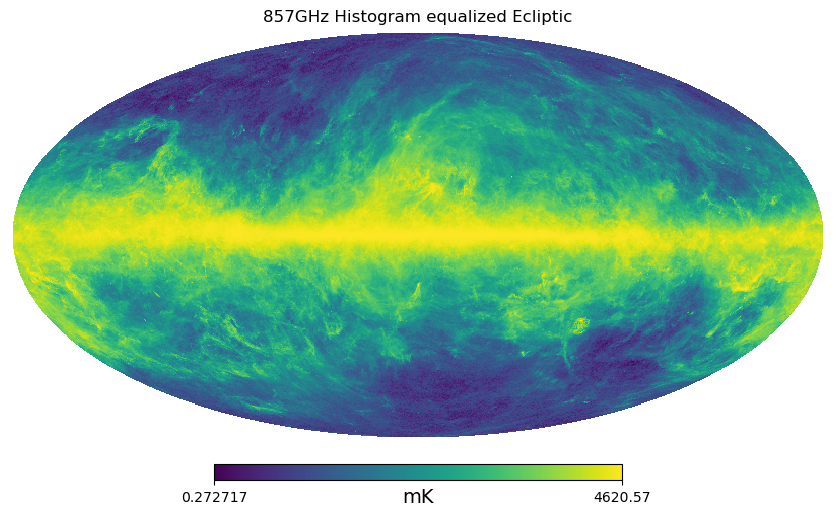

In [3]:
hp.mollview(
    m_857,
    #coord=["G", "E"],
    title="857GHz Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
)

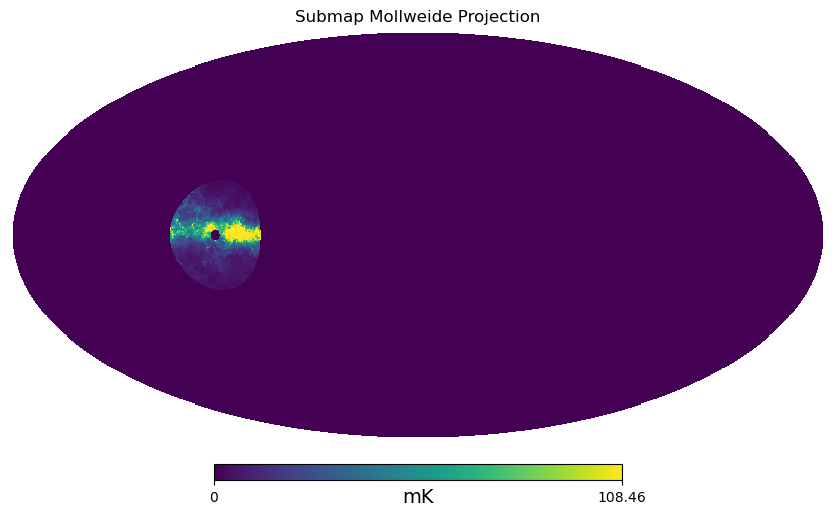

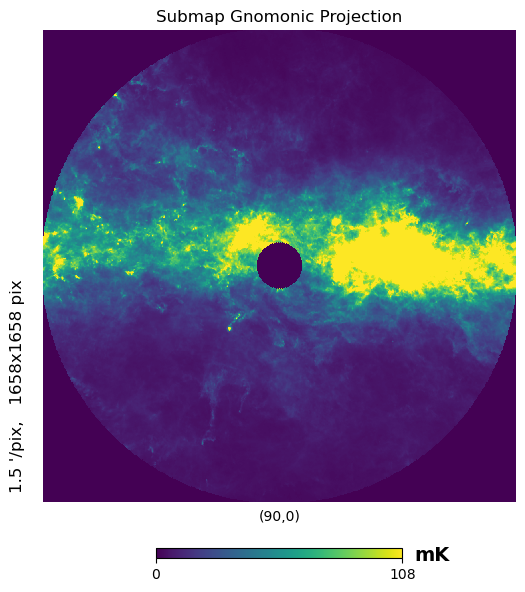

In [4]:
map_array = m_857
loc = [np.pi / 2, 0]
circ_radius = np.pi / 9
cutout_radius = circ_radius / 10
data = loc2data(map_array, loc, circ_radius, cutout_radius, show_mollview=True)

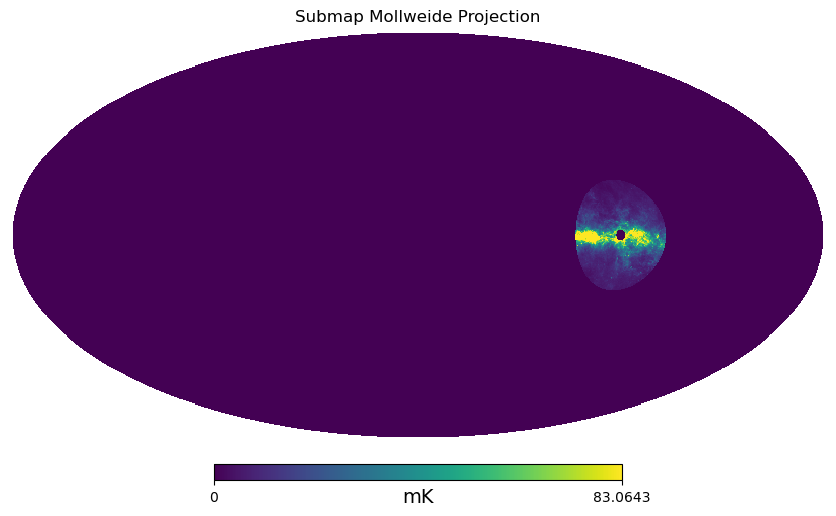

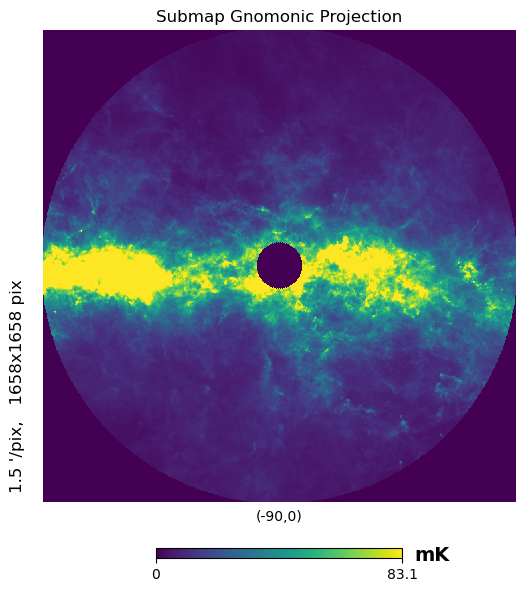

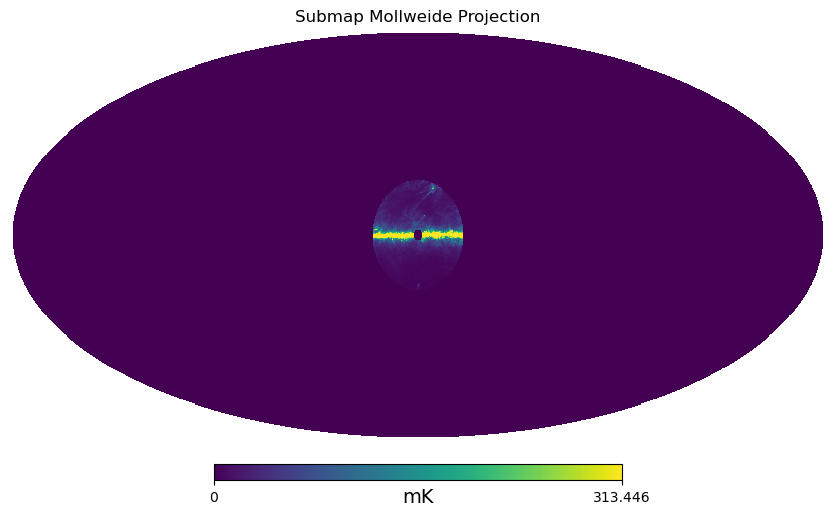

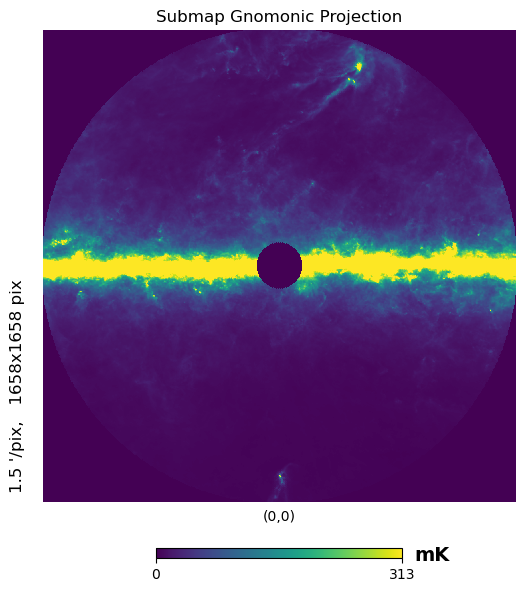

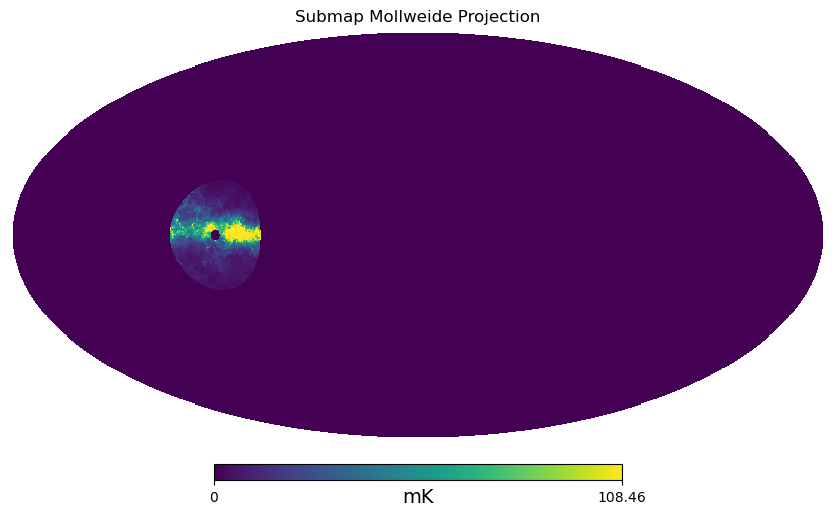

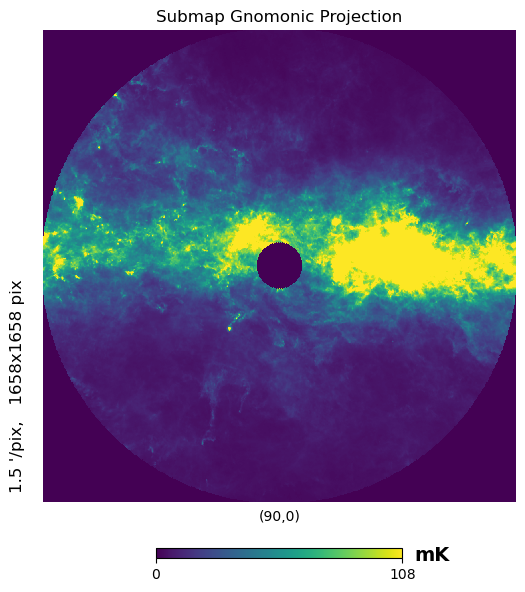

In [5]:
map_array = m_857
circ_radius = np.pi / 9
cutout_radius = circ_radius / 10
num_locs = 3

loc_array = np.zeros(shape=(2, num_locs))
loc_array[0] = np.linspace(-np.pi/2, np.pi/2, num_locs)
loc_list = loc_array.T.tolist()

data_arrays = []
for loc in loc_list:
    data_arrays.append(loc2data(map_array, loc, circ_radius, cutout_radius, show_mollview=True))

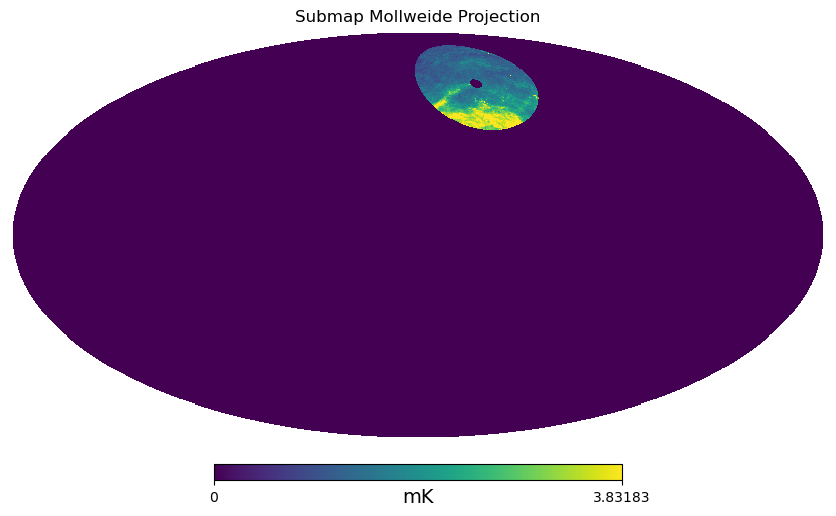

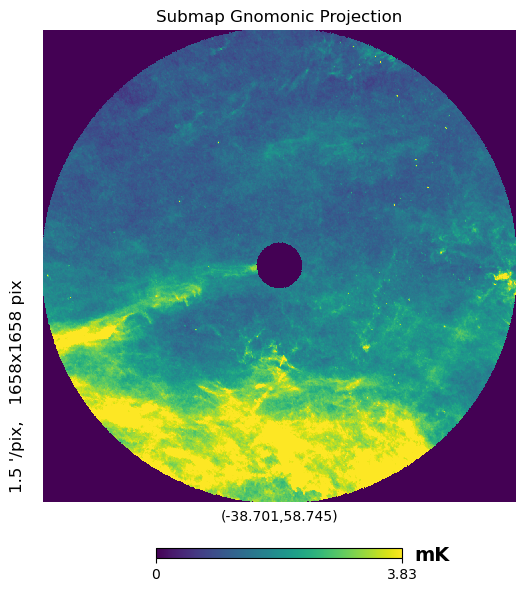

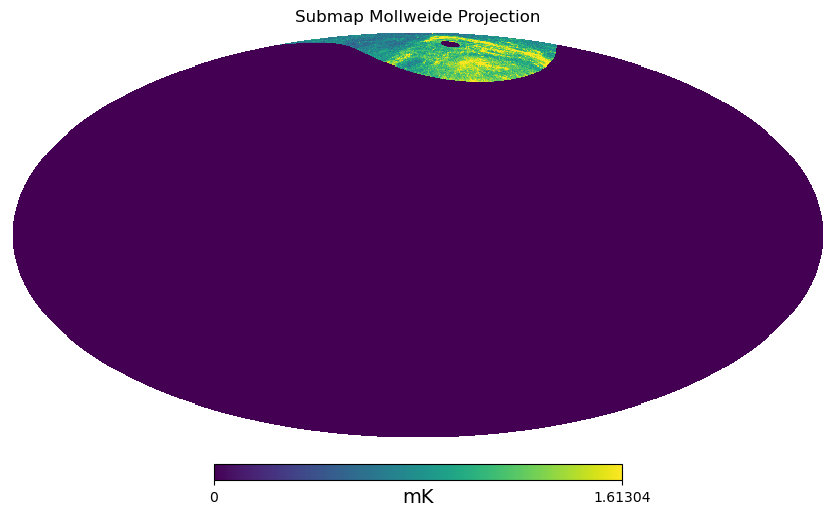

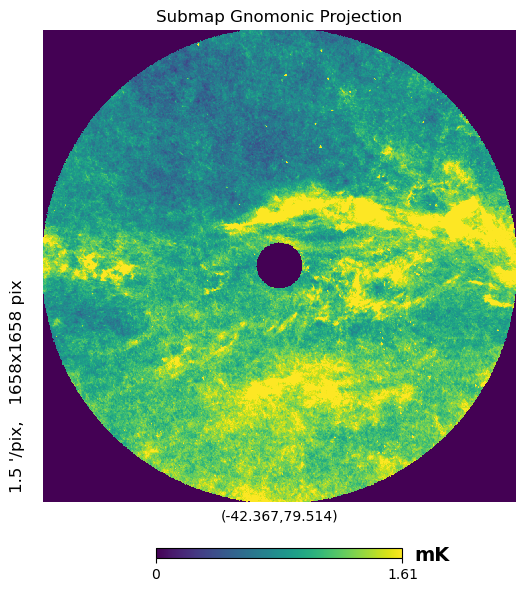

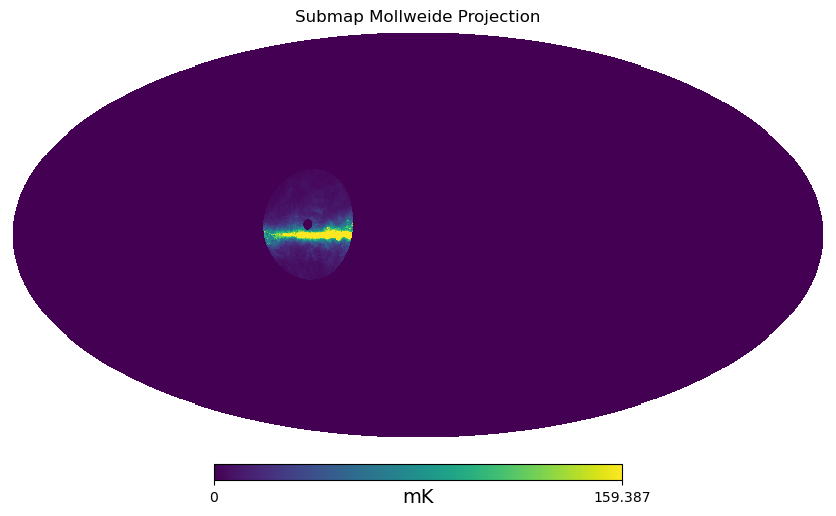

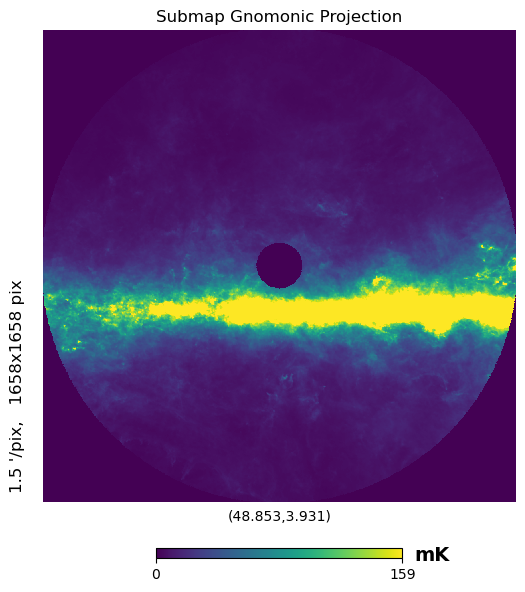

In [6]:
map_array = m_857
circ_radius = np.pi / 9
cutout_radius = circ_radius / 10
num_locs = 3

loc_list = get_rand_locs(num_locs)

data_arrays = []
for loc in loc_list:
    data_arrays.append(loc2data(map_array, loc, circ_radius,
                                cutout_radius, show_mollview=True))

In [7]:
data_arrays

[masked_array(
   data=[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
   mask=False,
   fill_value=-1.6375e+30),
 masked_array(
   data=[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
   mask=False,
   fill_value=-1.6375e+30),
 masked_array(
   data=[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
   mask=False,
   fill_value=-1.6375e+30)]

/Users/harjassandhu/anaconda3/envs/chang_baxter_research/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


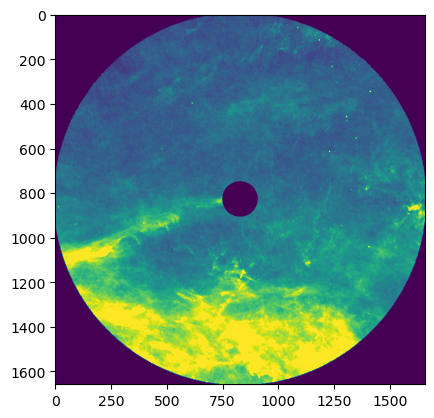

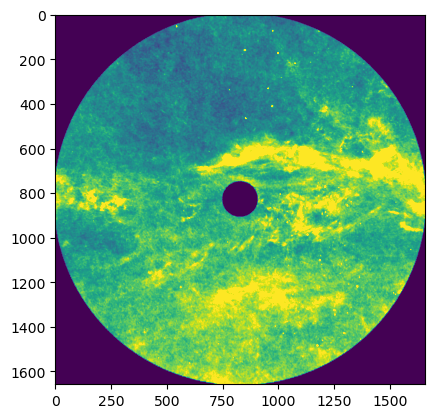

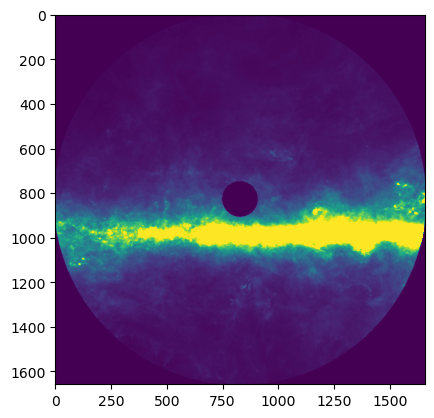

In [8]:
for data in data_arrays:
    range_max = np.percentile(data[data != 0], 95)
    plt.imshow(np.flip(data, 0), vmax=range_max) # For some reason, gnomview returns flipped image? Maybe just include this in functions.py?
    plt.show()